# Unsupervised Learning

> WARNING: Copying the code of this Python script will result to a mark of zero. DO NOT REUSE THIS SCRIPT !!!

## Section 1 - Data Loading

As usual, we need to firstly load the data and make the data ready to use.

In [1]:
import subprocess
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.mixture import GaussianMixture

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('openpyxl')

import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_excel('training_set.xlsx')
feature_names = dataframe.columns.tolist()

label = dataframe['Programme']

raw_feature = dataframe.drop(['Programme'], axis=1)

## Section 2 - Gaussian Mixture Model

We firstly train the Gaussian Mixture Models to examine how the data is distriuted. The model likelihood of GMM regarding to a separate testing dataset is known as one of the standard way to test the data distribution. Moreover, the model selection criteria AIC and BIC are also known as a good measurement of fitness of data to a model. We would firstly test how the data is distributed.

> Please consider how to select the best number of Gaussian components you need.

In [2]:
feature_gmm = ['Q1','Q2','Q3','Q4','Q5']

In [3]:
gmm_start = 5

In [4]:
gmm_end = 50

In [5]:
gmm_step = 5

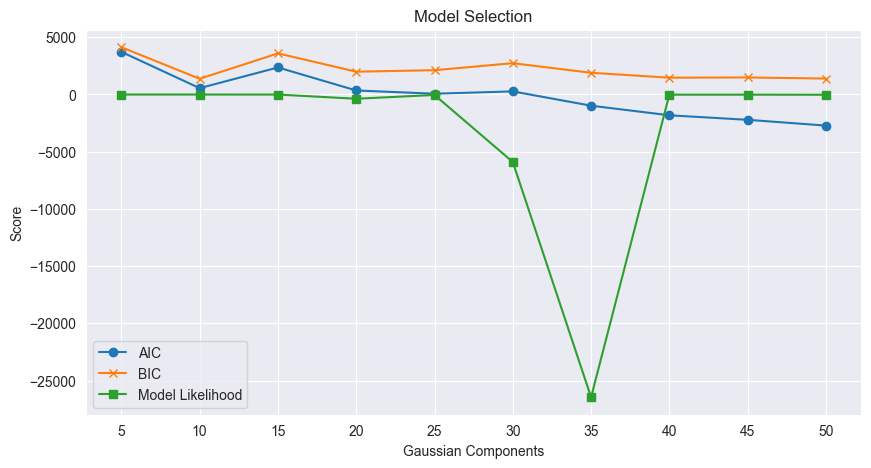

In [6]:
X_gmm = dataframe[feature_gmm]

X_train_gmm, X_test_gmm, y_train_gmm, y_test_gmm = train_test_split(X_gmm, label, test_size=0.2, random_state=42)

gm = GaussianMixture(n_components=2, random_state=0).fit(X_train_gmm)

aic_gmm = []
bic_gmm = []
likelihood_gmm = []
gc = range(gmm_start, gmm_end+1, gmm_step)

for k_gmm in gc:
    gm = GaussianMixture(n_components=k_gmm, random_state=0).fit(X_train_gmm)
    aic_gmm.append(gm.aic(X_train_gmm))
    bic_gmm.append(gm.bic(X_train_gmm))
    likelihood_temp = gm.score(X_test_gmm)
    likelihood_gmm.append(likelihood_temp)

plt.figure(figsize=(10, 5))
plt.plot(gc, aic_gmm, marker='o', label='AIC')
plt.plot(gc, bic_gmm, marker='x', label='BIC')
plt.plot(gc, likelihood_gmm, marker='s', label='Model Likelihood')
plt.xlabel('Gaussian Components')
plt.ylabel('Score')
plt.title('Model Selection')
plt.xticks(gc)
plt.legend()
plt.show()

## Section 3 - k-means

Next, we use k-means to cluster the dataset into 4 clusters. We could observe with a two-dimensional digram to partially observe the clustering result.

> Please consider how to visualise high-dimensional data in this case.

In [7]:
feature_km = ['Q1','Q2','Q3','Q4','Q5']

In [8]:
# km_x = 'Q1'
# km_x = 'Q2'
# km_x = 'Q3'
km_x = 'Q4'
# km_x = 'Q5'

In [9]:
# km_y = 'Q1'
# km_y = 'Q2'
# km_y = 'Q3'
# km_y = 'Q4'
km_y = 'Q5'

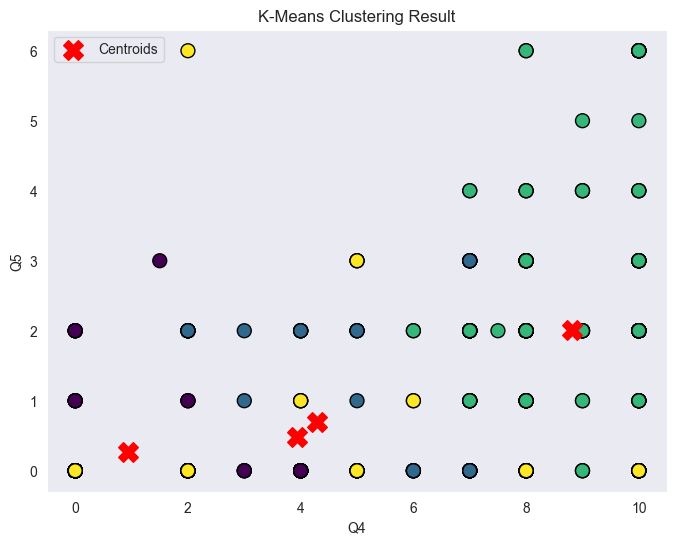

In [10]:
import matplotlib.pyplot as plt

X_KM = dataframe[feature_km]

clu_clf = KMeans(n_clusters=4, random_state=0, max_iter=500, verbose=0)
clu_clf.fit(X_KM)

labels_km = clu_clf.labels_
centers_km = clu_clf.cluster_centers_

# Adjusting the plotting method for the fixed indexing
def column_to_index(column_name):
    return feature_km.index(column_name)

x_index_km = column_to_index(km_x)
y_index_km = column_to_index(km_y)

plt.figure(figsize=(8, 6))
plt.scatter(X_KM[km_x], X_KM[km_y], c=labels_km, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(centers_km[:, x_index_km], centers_km[:, y_index_km], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Result')
plt.xlabel(km_x)
plt.ylabel(km_y)
plt.legend()
plt.grid()
plt.show()

The clustering process itself may not necessarily make sense. How about associate the clustering result with the student group? How could you quantise the association?

In [11]:
# Use confusion matrix to setup the cost matrix
cm = confusion_matrix(label-1, clu_clf.labels_)

# Use linear_sum_assignment to find the best match for cluster to class
row_ind, col_ind = linear_sum_assignment(-cm)

predicted = col_ind[clu_clf.labels_]

accuracy = accuracy_score(label, predicted)
f1score = f1_score(label, predicted,average='weighted')
print(f'Accuracy: {accuracy*100:.3f}%')
print(f'F1 Score: {f1score*100:.3f}%')
print(cm[:,col_ind])

Accuracy: 32.403%
F1 Score: 30.570%
[[128  20  29  12]
 [ 27  27  13  21]
 [ 16   7   2   1]
 [ 47  44  30  42]]


As classification result is very poor, is there a particular way that we could improve the result of prediction? In this section, we use k-means algorithm to develop more clusters and assign the label of each cluster accordingly. With a high accuracy of prediction, what problem may be caused? How can we prevent the problem?

In [12]:
min_cluster = 5

In [13]:
max_cluster = 400

In [14]:
step_cluster = 25

In [15]:
feature_km2 = ['Q1','Q2','Q3','Q4','Q5']

Number of clusters: 5, Accuracy: 52.361%
Number of clusters: 30, Accuracy: 57.082%
Number of clusters: 55, Accuracy: 59.871%
Number of clusters: 80, Accuracy: 60.086%
Number of clusters: 105, Accuracy: 63.090%
Number of clusters: 130, Accuracy: 66.524%
Number of clusters: 155, Accuracy: 70.172%
Number of clusters: 180, Accuracy: 72.961%
Number of clusters: 205, Accuracy: 76.609%
Number of clusters: 230, Accuracy: 78.541%
Number of clusters: 255, Accuracy: 80.901%
Number of clusters: 280, Accuracy: 82.833%
Number of clusters: 305, Accuracy: 85.837%
Number of clusters: 330, Accuracy: 88.412%
Number of clusters: 355, Accuracy: 90.343%


C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (353) found smaller than n_clusters (355). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\PY\Anaconda\envs\INT104\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (353) found smaller than n_clusters (380). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Number of clusters: 380, Accuracy: 90.343%


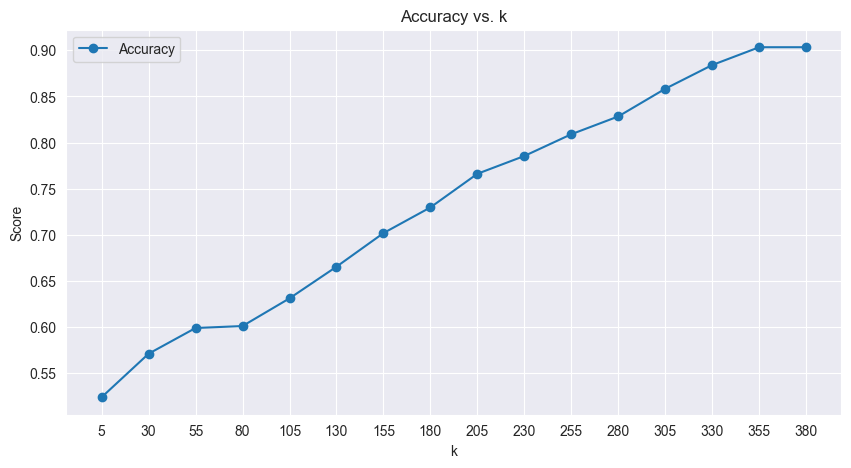

In [16]:
k_values = range(min_cluster, max_cluster+1, step_cluster)
accu = []
X_KM2 = dataframe[feature_km2]

for n_clusters in k_values:
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_KM2)

    # Get the cluster labels for each data point
    cluster_labels = kmeans.labels_

    # Initialize an empty array for new labels
    new_labels = np.empty_like(label)

    # For each unique cluster label
    for cluster_label in np.unique(cluster_labels):
        # Find the most common class label in 'labels' corresponding to this cluster label
        most_common_label = stats.mode(label[cluster_labels == cluster_label], keepdims=True)[0][0]
  
        # Assign this label to all data points in this cluster
        new_labels[cluster_labels == cluster_label] = most_common_label
    
    # Calculate accuracy
    accuracy = accuracy_score(label, new_labels)
    print(f'Number of clusters: {n_clusters}, Accuracy: {accuracy*100:.3f}%')

    accu.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accu, marker='o', label='Accuracy')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Accuracy vs. k')
plt.xticks(k_values)
plt.legend()
plt.show()

## Section 4 - Hierarchical Clustering

Next, we try hierarchical clustering. There are many different ways to build up hierarchical clustering. Try to find the best one. 

In [17]:
feature_hc = ['Q1','Q2','Q3','Q4','Q5']

In [18]:
method_hc = 'centroid'

In [19]:
max_d = 30

In [20]:
from scipy.spatial.distance import pdist, squareform

X_hc = dataframe[feature_hc]

np.random.seed(0)
linked = linkage(X_hc, method_hc)
cluster_hc = scipy.cluster.hierarchy.fcluster(linked, max_d, criterion='distance')

def calculate_distances(data, clusters):
    unique_clusters = np.unique(clusters)
    
    intra_cluster_distances = []
    inter_cluster_distances = []
    
    # Calculate intra-cluster distances
    for cluster in unique_clusters:
        cluster_points = data[clusters == cluster]
        if len(cluster_points) > 1:
            intra_dist = pdist(cluster_points).mean()  # Average pairwise distance
            intra_cluster_distances.append(intra_dist)
    
    # Calculate inter-cluster distances
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            cluster_i = data[clusters == unique_clusters[i]]
            cluster_j = data[clusters == unique_clusters[j]]
            inter_dist = pdist(np.vstack([cluster_i, cluster_j])).mean()  # Average pairwise distance
            inter_cluster_distances.append(inter_dist)
    
    # Calculate the average distances
    avg_intra_distance = np.mean(intra_cluster_distances) if intra_cluster_distances else 0
    avg_inter_distance = np.mean(inter_cluster_distances) if inter_cluster_distances else 1  # Avoid division by zero
    
    return avg_intra_distance, avg_inter_distance

# Calculate distances
avg_intra_distance, avg_inter_distance = calculate_distances(X_hc, cluster_hc)

# Calculate the ratio
if avg_inter_distance != 0:
    ratio = avg_intra_distance / avg_inter_distance
else:
    ratio = float('inf')  # Handle case where inter-cluster distance is zero

num_clusters_hc = len(np.unique(cluster_hc))
print(f"Number of clusters formed: {num_clusters_hc}")

# Output the results
print(f"Average Intra-cluster Distance: {avg_intra_distance:.4f}")
print(f"Average Inter-cluster Distance: {avg_inter_distance:.4f}")
print(f"Intra/Inter Cluster Distance Ratio: {ratio:.4f}")

Number of clusters formed: 1
Average Intra-cluster Distance: 8.5306
Average Inter-cluster Distance: 1.0000
Intra/Inter Cluster Distance Ratio: 8.5306


Again, we want to observe how the clustering result is associated with the student group.

> Do you have any method that could improve such associations?

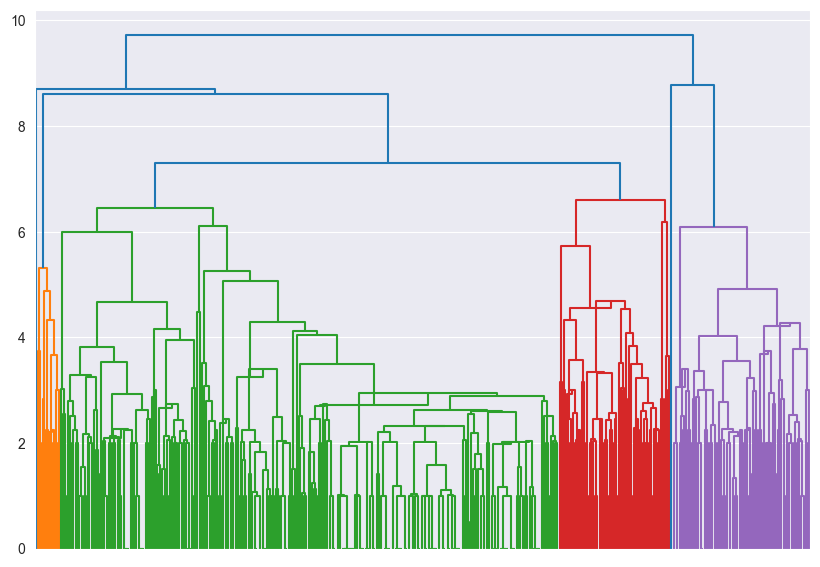

Accuracy: 2.146%
F1 Score: 30.570%
[[179   0   1   9]
 [ 65   1   0  22]
 [ 23   0   0   3]
 [114   0   0  49]]


In [21]:
np.random.seed(0)
linked2 = linkage(X_hc, method_hc)
predicted_labels = scipy.cluster.hierarchy.fcluster(linked2, 4, criterion='maxclust')

# Define a color palette
palette = ['r', 'g', 'b', 'm']

plt.figure(figsize=(10, 7))
dendrogram(linked, color_threshold=None, no_labels=True)
plt.show()



cm_hc = confusion_matrix(label-1, predicted_labels-1)

row_ind_hc, col_ind_hc = linear_sum_assignment(-cm_hc)

predicted_hc = col_ind_hc[predicted_labels-1]

accuracy = accuracy_score(label, predicted_hc)
f1score = f1_score(label, predicted,average='weighted')
print(f'Accuracy: {accuracy*100:.3f}%')
print(f'F1 Score: {f1score*100:.3f}%')
print(cm_hc[:,col_ind_hc])

> Can you figure out a solution that visualises the resulting cluster for the raw data?

In [22]:
feature_mix = ['Q1','Q2','Q3','Q4','Q5']

In [23]:
k_mix = 80

In [24]:
method_mix = 'ward'

The clustering method can be combined to pursue better performance. Here is an example. The next script uses k means to set up some "super samples" then build up a dendrogram accordingly. What advantage does this method bring? Can you think about some other solutions for the unsupervised learning method?

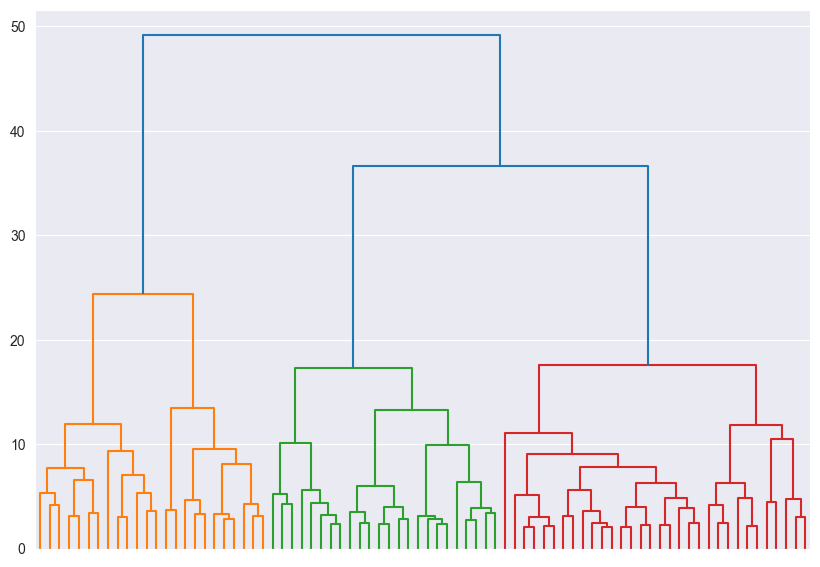

Accuracy: 13.948%
F1 Score: 30.570%
[[112   7  38  32]
 [ 30  20  14  24]
 [ 14   3   6   3]
 [ 47  33  21  62]]


In [25]:
X_mix = dataframe[feature_mix]

kmeans_mix = KMeans(n_clusters=k_mix, random_state=0, max_iter=500, verbose = 0)
kmeans_mix.fit(X_mix)

linked_mix = linkage(kmeans_mix.cluster_centers_, method_mix)
mix_labels = scipy.cluster.hierarchy.fcluster(linked_mix, 4, criterion='maxclust')

plt.figure(figsize=(10, 7))
dendrogram(linked_mix, color_threshold=None, no_labels=True)
plt.show()

tttt = kmeans_mix.labels_

for i in range(0,k_mix):
    temp = mix_labels[i]
    tttt[kmeans_mix.labels_==i] = temp

cm_mix = confusion_matrix(label-1, tttt-1)

row_ind_mix, col_ind_mix = linear_sum_assignment(-cm_mix)

predicted_mix = col_ind_mix[tttt-1]

accuracy = accuracy_score(label, predicted_mix)
f1score = f1_score(label, predicted,average='weighted')
print(f'Accuracy: {accuracy*100:.3f}%')
print(f'F1 Score: {f1score*100:.3f}%')
print(cm_mix[:,col_ind_mix])